In [1]:
import numpy as np
import tqdm
from numba import jit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
NUM_ROUNDS = 10000
MIN = 1
MAX = 1000
TOTAL = 100000

In [3]:
def roll(stavka, total, black, Max, plus=0):
    count = 0
    while True:
        
        if total < stavka or stavka > Max:
            return -count
        count += stavka
        random = np.random.randint(37)
        
        if (black) and (0 < random < 19):
            return stavka * 2 - count
        
        elif not(black) and (random > 18):
            return stavka * 2 - count
        
        else:
            total -= stavka
            stavka = stavka * 2 + plus

In [4]:
%%time
pluses = 10
scores = np.zeros((pluses,10000))
for i in tqdm.tqdm_notebook(range(pluses)):
    NUM_ROUNDS = 100000
    MIN = 1
    MAX = 1000
    TOTAL = 100000
    for j in range(NUM_ROUNDS):

        if TOTAL < MIN:
            break

        black = True
        TOTAL += roll(MIN,TOTAL,black,MAX,plus=i)

        black = not(black)
        if j % 10 == 0: scores[i,j // 10] = TOTAL  

A Jupyter Widget


CPU times: user 8.53 s, sys: 11.6 ms, total: 8.54 s
Wall time: 8.66 s


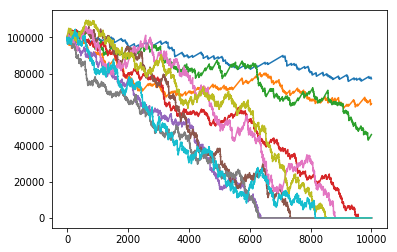

In [5]:
plt.plot(scores.T)